# Importación de Librerias

In [1]:
# Análisis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

---

In [2]:
!dir

 Volume in drive C is Primary
 Volume Serial Number is BE88-FD3B

 Directory of C:\Users\noroot\Desktop\precio-inmueble-ml

08/23/2025  02:46 PM    <DIR>          .
08/23/2025  02:46 PM    <DIR>          ..
08/23/2025  01:37 PM                17 .gitignore
08/23/2025  02:25 PM    <DIR>          .ipynb_checkpoints
08/23/2025  01:46 PM    <DIR>          .venta
08/23/2025  02:10 PM           341,263 dataset_bellavista.ipynb
08/23/2025  01:39 PM            30,149 dataset_bellavista.xlsx
08/23/2025  02:25 PM           339,165 dataset_los_olivos.ipynb
08/23/2025  02:46 PM             1,105 dataset_los_olivos.pkl
08/23/2025  01:39 PM            68,780 dataset_los_olivos.xlsx
08/23/2025  02:31 PM           387,502 dataset_magdalena.ipynb
08/23/2025  01:39 PM           137,250 dataset_magdalena.xlsx
08/23/2025  02:35 PM    <DIR>          flask_app
               8 File(s)      1,305,231 bytes
               5 Dir(s)  45,646,716,928 bytes free


In [3]:
# lectura del archivo excel
df = pd.read_excel("dataset_bellavista.xlsx")

In [4]:
filas, columnas = df.shape
print("Número de filas:", filas)
print("Número de columnas:", columnas)

Número de filas: 356
Número de columnas: 12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           356 non-null    int64  
 1   Trimestre                     356 non-null    int64  
 2   Precio en dólares corrientes  356 non-null    float64
 3   Tipo de cambio                356 non-null    float64
 4   Distrito                      356 non-null    object 
 5   Superficie                    356 non-null    int64  
 6   Número de habitaciones        356 non-null    int64  
 7   Número de baños               356 non-null    int64  
 8   Número de garajes             356 non-null    int64  
 9   Piso de ubicación             323 non-null    float64
 10  Vista al exterior             323 non-null    float64
 11  Años de antigüedad            356 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 33.5+ KB


In [6]:
df.head()

,Año,Trimestre,Precio en dólares corrientes,Tipo de cambio,Distrito,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
0,2021,1,70000.0,3.659334,Bellavista,55,2,1,0,NaN,NaN,36
1,2021,1,56000.0,3.659334,Bellavista,80,3,1,0,NaN,NaN,25
2,2021,1,145000.0,3.659334,Bellavista,120,4,2,0,NaN,NaN,12
3,2021,1,49661.0,3.659334,Bellavista,57,2,2,0,NaN,NaN,7
4,2021,1,79000.0,3.659334,Bellavista,70,2,2,0,NaN,NaN,8


In [7]:
df.isnull().sum()

Año                              0
Trimestre                        0
Precio en dólares corrientes     0
Tipo de cambio                   0
Distrito                         0
Superficie                       0
Número de habitaciones           0
Número de baños                  0
Número de garajes                0
Piso de ubicación               33
Vista al exterior               33
Años de antigüedad               0
dtype: int64

## Eliminar columnas

**Columna Distrito**
- En los datos, todos los registros tienen el valor "Bellavista" → no aporta variabilidad al modelo.
- Si todos los valores son iguales, esta variable no ayuda a explicar el precio

**Vista al exterior**
- Según los datos, solo contiene "1" o vacío.
- Si casi todos son "1" → es prácticamente constante, no aporta valor.

In [8]:
df.drop(["Distrito", "Vista al exterior"], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           356 non-null    int64  
 1   Trimestre                     356 non-null    int64  
 2   Precio en dólares corrientes  356 non-null    float64
 3   Tipo de cambio                356 non-null    float64
 4   Superficie                    356 non-null    int64  
 5   Número de habitaciones        356 non-null    int64  
 6   Número de baños               356 non-null    int64  
 7   Número de garajes             356 non-null    int64  
 8   Piso de ubicación             323 non-null    float64
 9   Años de antigüedad            356 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 27.9 KB


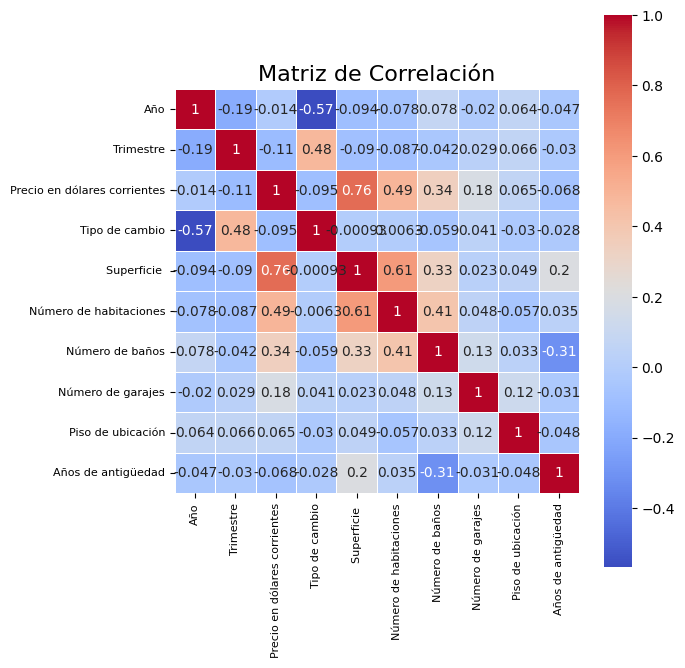

In [10]:
# Calcular la correlación
corr = df.corr()

plt.figure(figsize=(len(corr.columns) * 0.7, len(corr.columns) * 0.7))  # ajustar tamaño dinámico
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    square=True,        # celdas cuadradas
    linewidths=0.5
)

plt.title("Matriz de Correlación", fontsize=16)
plt.xticks(rotation=90, fontsize=8)   # gira labels eje X
plt.yticks(rotation=0, fontsize=8)    # labels eje Y
plt.tight_layout()
plt.show()

¡Muy bien 👌! Lo que muestras es una **matriz de correlación** entre todas las variables numéricas de tu dataset.
Vamos a interpretarla con respecto al **target: "Precio en dólares corrientes"**.

---

### 🔹 ¿Qué es la correlación?

* Es un valor entre **-1 y 1** que mide la fuerza y dirección de la relación lineal entre dos variables.

  * **1.0** → correlación positiva perfecta (si sube X, también sube Y).
  * **0** → no hay relación lineal.
  * **-1.0** → correlación negativa perfecta (si sube X, baja Y).

En la matriz:

* Rojo → correlación positiva.
* Azul → correlación negativa.
* Celdas con valores cercanos a 0 → casi sin relación.

---

### 🔹 Variables más relacionadas con el **Precio en dólares corrientes**

De la matriz que muestras:

1. **Superficie (0.76)** → **fuerte correlación positiva**.
   👉 A mayor superficie, mayor precio. Es la variable más importante.

2. **Número de habitaciones (0.49)** → correlación positiva moderada.
   👉 Más habitaciones tienden a aumentar el precio.

3. **Tipo de cambio (≈ -0.095, muy bajo)** → correlación casi nula.
   👉 No influye de manera lineal.

4. **Número de baños (0.34)** → correlación positiva moderada-baja.

5. **Número de garajes (0.18)** → correlación baja pero positiva.

6. **Piso de ubicación (0.065)** y **Años de antigüedad (0.028)** → correlación casi nula.

7. **Año (-0.014)** y **Trimestre (-0.11)** → prácticamente sin relación con el precio.

---

### 🔹 Conclusión para tu modelo de regresión

* Las variables que más impacto **lineal** tienen en el precio son:
  ✅ **Superficie**
  ✅ **Número de habitaciones**
  ✅ **Número de baños**
  (posiblemente **Número de garajes** también aunque sea más débil).

* Variables como **Año, Trimestre, Antigüedad, Piso** tienen muy baja correlación lineal, aunque podrían ser útiles en modelos no lineales (RandomForest, XGBoost).

---

📊 En resumen:

* **Superficie es tu predictor más fuerte** (0.76).
* Después siguen **habitaciones y baños**.
* Las demás aportan poco si hablamos de regresión lineal, pero no significa que debas descartarlas de inmediato (podrían tener efectos combinados).

---

¿Quieres que te arme un **ranking visual de importancia de variables** (con un gráfico de barras) para que veas cuáles pesan más sobre el precio antes de entrenar tu modelo?


In [11]:
# 1. Preparar los datos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Supongamos que tu dataframe se llama df
y = df["Precio en dólares corrientes"]
X = df.drop(columns=["Precio en dólares corrientes"])  # quitamos el target

# 2. Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Crear pipeline con imputación + escalado + modelo
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # reemplaza NaN por la mediana
    ("scaler", StandardScaler()),                  # normaliza
    ("model", LinearRegression())                  # regresión lineal
])

# 4. Entrenar la regresión lineal
pipeline.fit(X_train, y_train)

# 5. Ver importancia por coeficientes
coef = pipeline.named_steps["model"].coef_

importancia_coef = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": coef,
    "Influencia_abs": abs(coef)
}).sort_values(by="Influencia_abs", ascending=False)

print("📊 Importancia por coeficientes:")
print(importancia_coef)

# 6. Ver importancia por permutación (más realista)
result = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.DataFrame({
    "Variable": X.columns,
    "Importancia_media": result.importances_mean,
    "Importancia_std": result.importances_std
}).sort_values(by="Importancia_media", ascending=False)

print("\n📊 Importancia por permutación:")
print(importancia_perm)

📊 Importancia por coeficientes:
                 Variable   Coeficiente  Influencia_abs
3             Superficie   23978.439944    23978.439944
8      Años de antigüedad  -7527.133816     7527.133816
6       Número de garajes   4883.985245     4883.985245
2          Tipo de cambio  -4095.759240     4095.759240
5         Número de baños  -1464.469149     1464.469149
0                     Año   -546.570866      546.570866
1               Trimestre    277.725582      277.725582
7       Piso de ubicación   -258.318665      258.318665
4  Número de habitaciones    231.018199      231.018199

📊 Importancia por permutación:
                 Variable  Importancia_media  Importancia_std
3             Superficie            1.244808         0.161302
8      Años de antigüedad           0.089316         0.031302
6       Número de garajes           0.044196         0.016259
2          Tipo de cambio           0.029815         0.018452
0                     Año           0.003110         0.002535
1   

¡Excelente! 🚀 Ahora tienes **dos formas distintas de medir la importancia de las variables** para predecir tu target **“Precio en dólares corrientes”**:

---

## 🔹 1. Importancia por **coeficientes de regresión lineal**

Esto viene directamente de la **fórmula del modelo lineal**:

$$
Precio = b_0 + b_1X_1 + b_2X_2 + \dots + b_nX_n
$$

* Cada **coeficiente** indica cuánto cambia el precio si esa variable sube una unidad (manteniendo las demás constantes).
* Para comparar el peso de cada variable, se suele mirar el **valor absoluto** del coeficiente (`Influence_abs`).

📊 Tus resultados:

* **Superficie (≈ 23,978 USD por m²)** → clarísimo predictor más fuerte.
* **Años de antigüedad (-7,527 USD)** → casas más antiguas reducen el precio.
* **Número de garajes (≈ +4,884 USD)** → cada cochera agrega valor.
* **Tipo de cambio (-4,096 USD)** → leve efecto negativo.
* Habitaciones, baños, piso, año y trimestre → impacto mucho más bajo (coeficientes pequeños).

👉 Este método **asume relación lineal** y puede estar sesgado si hay multicolinealidad (variables muy correlacionadas entre sí, ej: superficie y habitaciones).

---

## 🔹 2. Importancia por **permutación**

Este es un método más robusto y práctico:

1. Se entrena el modelo.
2. Luego se permuta (mezcla) una columna al azar en los datos de validación.
3. Se mide cuánto empeora el rendimiento (ej: R² o RMSE).

   * Si el score baja mucho → esa variable era importante.
   * Si no cambia → la variable aporta poco o nada.

📊 Tus resultados:

* **Superficie (1.24, muy alto)** → es la única variable realmente determinante.
* **Años de antigüedad (0.089)** → tiene algo de importancia.
* **Garajes (0.044)** y **Tipo de cambio (0.030)** → importancia menor.
* **Año, trimestre, habitaciones, piso y baños** → prácticamente **no aportan información** en tu modelo lineal (su permutación no afecta la predicción).
* **Baños incluso da negativo (-0.003)** → significa que cuando se permuta, a veces el modelo hasta mejora, o sea esa variable estaba metiendo ruido.

---

## 🔹 Comparación entre ambos métodos

* **Coeficientes**: muestran la influencia teórica (en USD por unidad).
* **Permutación**: mide la importancia práctica, es decir, qué tanto mejora realmente el modelo si incluyes esa variable.

👉 En tu caso:

* **Ambos coinciden en que la Superficie es la variable reina**.
* La regresión “cree” que habitaciones y baños importan, pero la permutación demuestra que **no están ayudando al modelo** (probablemente porque su efecto ya está capturado por la superficie).
* Años de antigüedad sí aporta un poco (negativo).
* Garajes y tipo de cambio ayudan, pero poco.

---

✅ **Conclusión final:**
Si quieres un modelo de regresión lineal **preciso y parsimonioso**, te conviene usar:

* **Superficie** (muy fuerte).
* **Años de antigüedad** (moderado).
* **Garajes** (bajo).
* Quizá **tipo de cambio** si quieres afinar.
  Y descartar o dejar en segundo plano: **año, trimestre, habitaciones, baños, piso**, porque no aportan al modelo (o hasta meten ruido).

---

¿Quieres que te arme un **modelo reducido con solo las variables más importantes** y compararlo con el modelo completo (ver R² y RMSE de ambos)?


In [12]:
df.head()

,Año,Trimestre,Precio en dólares corrientes,Tipo de cambio,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Años de antigüedad
0,2021,1,70000.0,3.659334,55,2,1,0,NaN,36
1,2021,1,56000.0,3.659334,80,3,1,0,NaN,25
2,2021,1,145000.0,3.659334,120,4,2,0,NaN,12
3,2021,1,49661.0,3.659334,57,2,2,0,NaN,7
4,2021,1,79000.0,3.659334,70,2,2,0,NaN,8


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           356 non-null    int64  
 1   Trimestre                     356 non-null    int64  
 2   Precio en dólares corrientes  356 non-null    float64
 3   Tipo de cambio                356 non-null    float64
 4   Superficie                    356 non-null    int64  
 5   Número de habitaciones        356 non-null    int64  
 6   Número de baños               356 non-null    int64  
 7   Número de garajes             356 non-null    int64  
 8   Piso de ubicación             323 non-null    float64
 9   Años de antigüedad            356 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 27.9 KB


In [14]:
# Contar valores vacíos por columna
df.isnull().sum()

Año                              0
Trimestre                        0
Precio en dólares corrientes     0
Tipo de cambio                   0
Superficie                       0
Número de habitaciones           0
Número de baños                  0
Número de garajes                0
Piso de ubicación               33
Años de antigüedad               0
dtype: int64

In [15]:
# 3. Rellenar NaN con la media de cada columna
df = df.fillna(df.mean(numeric_only=True))

In [16]:
# df = pd.get_dummies(df, columns=["Distrito"], drop_first=True)

## Entrenamiento

In [17]:
X = df.drop(columns=["Precio en dólares corrientes"])
y = df["Precio en dólares corrientes"]

In [18]:
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()
# Ajustar (entrenar) el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
# Predecir sobre el set de prueba
y_pred = model.predict(X_test)

In [21]:
y_pred

array([ 63423.80474614,  61387.71317477, 118434.83419237, 111270.09940315,
        63418.00272957,  49772.21868049, 107260.22049007,  88616.56837516,
        61924.41947409, 110036.05984922,  84846.95707526,  65592.46354248,
        73315.43731082,  63205.48422824,  55562.50944754,  77039.43974926,
        79261.02099597,  64984.56789007,  67729.98207552,  77673.10910973,
        71548.14152708,  86964.16011075, 122234.70389046,  40504.01180491,
       109524.75971121, 132968.38276036,  85316.790809  ,  96150.95460412,
        56497.38839104,  95020.70311141,  55924.00780744,  92842.90374347,
        65628.06524865, 126021.07277527,  89746.56494601,  53392.00221356,
        78489.66733866,  82418.46954058,  79536.49135047,  88722.36902348,
       140082.93365649,  95525.92646406,  93151.23070574,  77673.10910973,
        92379.56927032,  54386.07094137, 106438.08783748,  71247.98602946,
        79463.14333269, 118664.78850401,  79000.69722934,  57113.67066331,
        57113.67066331,  

In [22]:
import pandas as pd

# Crear un DataFrame comparando valores reales vs predichos
resultados = pd.DataFrame({
    "Real": y_test.values,
    "Predicho": y_pred,
    "Diferencia": y_test.values - y_pred
})

print(resultados)  # mostrar las primeras filas


             Real       Predicho    Diferencia
0    45000.000000   63423.804746 -18423.804746
1    69000.000000   61387.713175   7612.286825
2   171617.614208  118434.834192  53182.780015
3   135000.000000  111270.099403  23729.900597
4    60000.000000   63418.002730  -3418.002730
..            ...            ...           ...
67   82061.904952   83111.426166  -1049.521215
68   75000.000000  108157.249201 -33157.249201
69   77000.000000   96388.059090 -19388.059090
70   71474.244936   77208.514248  -5734.269312
71   63000.000000   57666.868649   5333.131351

[72 rows x 3 columns]


## Evaluar el modelo

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Raíz del error cuadrático medio
rmse = np.sqrt(mse)

# R² (qué tan bien explica la varianza de y)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 257723514.62093735
RMSE: 16053.769483237802
R²: 0.6631810993465073


Perfecto 🙌, esos son los **métricos de evaluación** de tu modelo de regresión lineal. Vamos a interpretarlos:

---

## 🔹 1. **MSE (Mean Squared Error)**

👉 `257,723,514`

* Es el **error cuadrático medio**:

  $$
  MSE = \frac{1}{n}\sum (y_{real} - y_{pred})^2
  $$
* Mientras más bajo, mejor.
* Como está en **unidades al cuadrado** (USD²), no es tan fácil de interpretar directamente.

---

## 🔹 2. **RMSE (Root Mean Squared Error)**

👉 `16,053.77`

* Es la **raíz cuadrada del MSE**, por lo tanto vuelve el error a las **mismas unidades del precio (USD)**.
* Significa que, en promedio, tu modelo se equivoca en **≈ 16 mil dólares** al predecir el precio de una vivienda.
* Si el precio promedio de las viviendas en tu dataset fuera, por ejemplo, **100,000 USD**, entonces el error sería **≈ 16%** del valor típico → **aceptable**.
* Si el promedio fuera, digamos, 50,000 USD, entonces el error es muy alto (≈ 32%).

---

## 🔹 3. **R² (Coeficiente de determinación)**

👉 `0.663` (≈ 66.3%)

* Representa **qué proporción de la variabilidad del precio tu modelo logra explicar**.
* Escala:

  * **0.0** → no explica nada (tan malo como adivinar la media).
  * **1.0** → explica todo perfectamente.
  * Valores negativos → peor que predecir siempre la media.
* Tu valor de **0.66** significa que el modelo explica alrededor del **66% de la variabilidad en los precios**.

---

## 🔹 Interpretación conjunta

* El modelo no es perfecto, pero **sí captura gran parte de la relación entre superficie, antigüedad, garajes, etc. con el precio**.
* El **RMSE de 16,000 USD** indica que las predicciones pueden estar “fuera” por ese margen.
* El **R² de 0.66** es razonable en problemas de precios de inmuebles (donde siempre hay ruido: ubicación, demanda, acabados, etc. que no siempre están en los datos).

---

✅ **Conclusión:**
Tu modelo lineal explica **2/3 del precio** (lo cual está bien para un primer modelo) y se equivoca en promedio en **16k USD**.

👉 Para mejorar: podrías probar

* Modelos no lineales (RandomForest, GradientBoosting, XGBoost).
* Feature engineering (ej: precio por m², variables de ubicación/distrito, interacción entre superficie y número de habitaciones).

---

¿Quieres que te prepare un **RandomForest Regressor** y compare sus métricos contra tu regresión lineal, para ver si mejora el RMSE y R²?


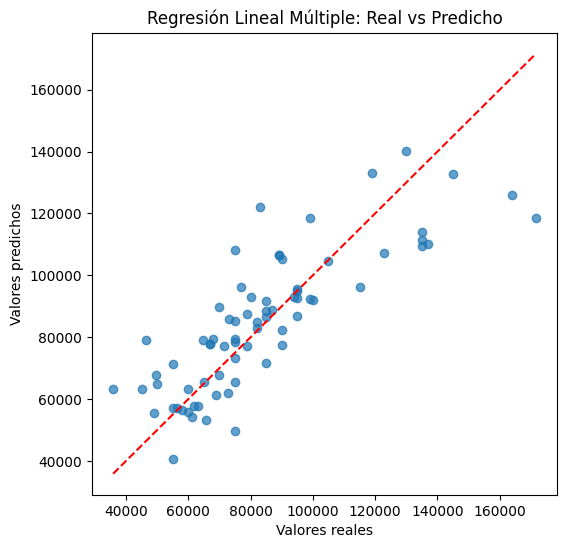

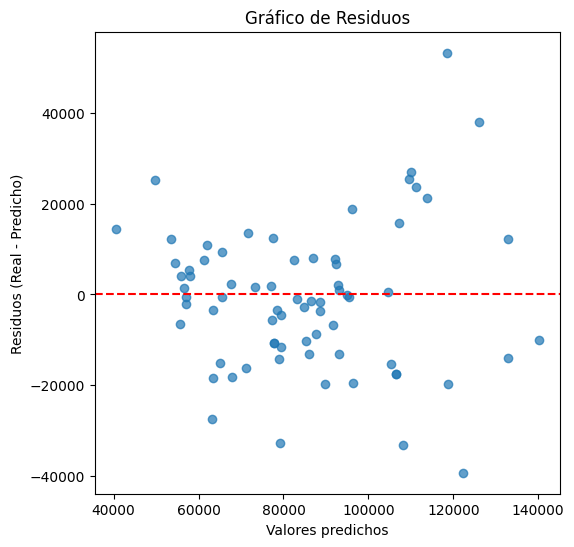

In [24]:
import matplotlib.pyplot as plt

# --- 1. Gráfico Real vs Predicho ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Regresión Lineal Múltiple: Real vs Predicho")
plt.show()

# --- 2. Gráfico de Residuos ---
residuos = y_test - y_pred

plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos (Real - Predicho)")
plt.title("Gráfico de Residuos")
plt.show()


In [25]:
# cuánto influye cada variable en el precio
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_
})
print(coeficientes.sort_values(by="Coeficiente", ascending=False))

                 Variable   Coeficiente
6       Número de garajes  11654.011608
3             Superficie     980.535122
4  Número de habitaciones    361.870344
1               Trimestre    237.749246
0                     Año   -488.678391
8      Años de antigüedad   -544.153768
7       Piso de ubicación  -2138.912416
5         Número de baños  -2574.630558
2          Tipo de cambio -38363.672226


In [26]:
import joblib

# Guardar el modelo entrenado en un archivo .pkl
joblib.dump(model, "dataset_bellavista.pkl")

['dataset_bellavista.pkl']

In [27]:
!ls

dataset_bellavista.ipynb
dataset_bellavista.pkl
dataset_bellavista.xlsx
dataset_los_olivos.ipynb
dataset_los_olivos.pkl
dataset_los_olivos.xlsx
dataset_magdalena.ipynb
dataset_magdalena.xlsx
flask_app


---

---

In [28]:
# Cargar el modelo desde el archivo .pkl
modelo_cargado = joblib.load("dataset_bellavista.pkl")

# Ahora puedes usarlo directamente
y_pred = modelo_cargado.predict(X_test)

In [29]:
y_pred

array([ 63423.80474614,  61387.71317477, 118434.83419237, 111270.09940315,
        63418.00272957,  49772.21868049, 107260.22049007,  88616.56837516,
        61924.41947409, 110036.05984922,  84846.95707526,  65592.46354248,
        73315.43731082,  63205.48422824,  55562.50944754,  77039.43974926,
        79261.02099597,  64984.56789007,  67729.98207552,  77673.10910973,
        71548.14152708,  86964.16011075, 122234.70389046,  40504.01180491,
       109524.75971121, 132968.38276036,  85316.790809  ,  96150.95460412,
        56497.38839104,  95020.70311141,  55924.00780744,  92842.90374347,
        65628.06524865, 126021.07277527,  89746.56494601,  53392.00221356,
        78489.66733866,  82418.46954058,  79536.49135047,  88722.36902348,
       140082.93365649,  95525.92646406,  93151.23070574,  77673.10910973,
        92379.56927032,  54386.07094137, 106438.08783748,  71247.98602946,
        79463.14333269, 118664.78850401,  79000.69722934,  57113.67066331,
        57113.67066331,  

In [30]:
X_test

,Año,Trimestre,Tipo de cambio,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Años de antigüedad
227,2023,2,3.699146,51,2,1,0,0.0,5
42,2021,3,4.044573,74,3,2,0,0.0,24
256,2023,4,3.780165,120,4,2,0,0.0,20
182,2023,1,3.818142,131,4,2,0,0.0,49
56,2021,3,4.044573,72,2,2,0,0.0,16
...,...,...,...,...,...,...,...,...,...
196,2023,2,3.699146,75,3,2,0,0.0,8
244,2023,3,3.674333,96,3,2,0,0.0,2
93,2022,2,3.748333,94,3,1,0,0.0,20
255,2023,4,3.780165,70,3,2,0,0.0,5


---

In [31]:
import joblib
modelo = joblib.load("dataset_bellavista.pkl")
print(modelo.feature_names_in_)


['Año' 'Trimestre' 'Tipo de cambio' 'Superficie ' 'Número de habitaciones'
 'Número de baños' 'Número de garajes' 'Piso de ubicación'
 'Años de antigüedad']
